In [2]:
!pip install -q tensorflow_hub

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import tensorflow as tf
import tensorflow_hub as hub

In [4]:
url = 'https://en.wikipedia.org/wiki/List_of_fatal_accidents_and_incidents_involving_commercial_aircraft_in_the_United_States'

In [5]:
df = pd.read_html(url)

In [6]:
df = pd.DataFrame(df[0])
df.head()

,Date,Fatalities,Injuries,Survivors,Flight(s) or incident,Location,State or territory,Aircraft,Summary
0,"January 1, 2024",1,0,0,2024 Salt Lake City passenger death incident,Salt Lake City,Utah,Airbus A220-100,A passenger entered the airport grounds unauth...
1,"June 23, 2023",1,0,0,2023 San Antonio ground crew suicide incident,San Antonio,Texas,Airbus A319,A ground crewman was ingested into an engine o...
2,"December 31, 2022",1,0,0,2022 Montgomery ground crew incident,Montgomery,Alabama,Embraer 175,An airline worker was pulled into the engine o...
3,"September 4, 2022",10,0,0,2022 Mutiny Bay DHC-3 Otter crash,Mutiny Bay near Whidbey Island,Washington,de Havilland Canada DHC-3 Otter,"Carrying tourists, the seaplane nosedived and ..."
4,"May 7, 2020",1,0,58,Southwest Airlines Flight 1392,Austin,Texas,Boeing 737-700,A man who had illegally entered the airfield w...


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 273 entries, 0 to 272
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Date                   273 non-null    object
 1   Fatalities             273 non-null    object
 2   Injuries               269 non-null    object
 3   Survivors              273 non-null    int64 
 4   Flight(s) or incident  273 non-null    object
 5   Location               273 non-null    object
 6   State or territory     273 non-null    object
 7   Aircraft               273 non-null    object
 8   Summary                273 non-null    object
dtypes: int64(1), object(8)
memory usage: 19.3+ KB


In [8]:
from datetime import datetime as dt

In [9]:
df.drop(axis=1, labels='Flight(s) or incident', inplace=True)
for date in df['Date']:
    try:
        date = dt.strptime(date, '%B %d, %Y')
    except:
        date = dt.strptime(date, '%B %d , %Y')

df.loc[23, 'Date'] = 'January 8, 2003'

In [10]:
df['Date'] = pd.to_datetime(df['Date'], format='%B %d, %Y')

In [11]:
df.loc[27, 'Fatalities'] = 679
df.loc[28, 'Fatalities'] = 1700

In [12]:
df.loc[27, 'Injuries'] = 0
df.loc[28, 'Injuries'] = 0
df.loc[91, 'Injuries'] = 5

df['Injuries'] = df['Injuries'].fillna(0)

In [13]:
df['Fatalities'] = pd.to_numeric(df['Fatalities'])
df['Injuries'] = pd.to_numeric(df['Injuries'])

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 273 entries, 0 to 272
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Date                273 non-null    datetime64[ns]
 1   Fatalities          273 non-null    int64         
 2   Injuries            273 non-null    int64         
 3   Survivors           273 non-null    int64         
 4   Location            273 non-null    object        
 5   State or territory  273 non-null    object        
 6   Aircraft            273 non-null    object        
 7   Summary             273 non-null    object        
dtypes: datetime64[ns](1), int64(3), object(4)
memory usage: 17.2+ KB


In [15]:
df.describe()

,Date,Fatalities,Injuries,Survivors
count,273,273.000000,273.000000,273.000000
mean,1971-10-18 18:01:19.120879120,43.714286,8.615385,19.450549
min,1919-07-21 00:00:00,1.000000,0.000000,0.000000
25%,1955-11-01 00:00:00,7.000000,0.000000,0.000000
50%,1968-12-27 00:00:00,21.000000,0.000000,0.000000
75%,1987-12-07 00:00:00,46.000000,8.000000,13.000000
max,2024-01-01 00:00:00,1700.000000,187.000000,346.000000
std,NaN,116.403673,22.056796,48.155752


In [16]:
df.set_index(['Date'], inplace=True)

In [17]:
df.head()

,Fatalities,Injuries,Survivors,Location,State or territory,Aircraft,Summary
Date,,,,,,,
2024-01-01,1,0,0,Salt Lake City,Utah,Airbus A220-100,A passenger entered the airport grounds unauth...
2023-06-23,1,0,0,San Antonio,Texas,Airbus A319,A ground crewman was ingested into an engine o...
2022-12-31,1,0,0,Montgomery,Alabama,Embraer 175,An airline worker was pulled into the engine o...
2022-09-04,10,0,0,Mutiny Bay near Whidbey Island,Washington,de Havilland Canada DHC-3 Otter,"Carrying tourists, the seaplane nosedived and ..."
2020-05-07,1,0,58,Austin,Texas,Boeing 737-700,A man who had illegally entered the airfield w...


## Exploratory analysis

In [18]:
df_location = df['State or territory'].value_counts()

In [19]:
import seaborn as sns

<Axes: xlabel='count', ylabel='State or territory'>

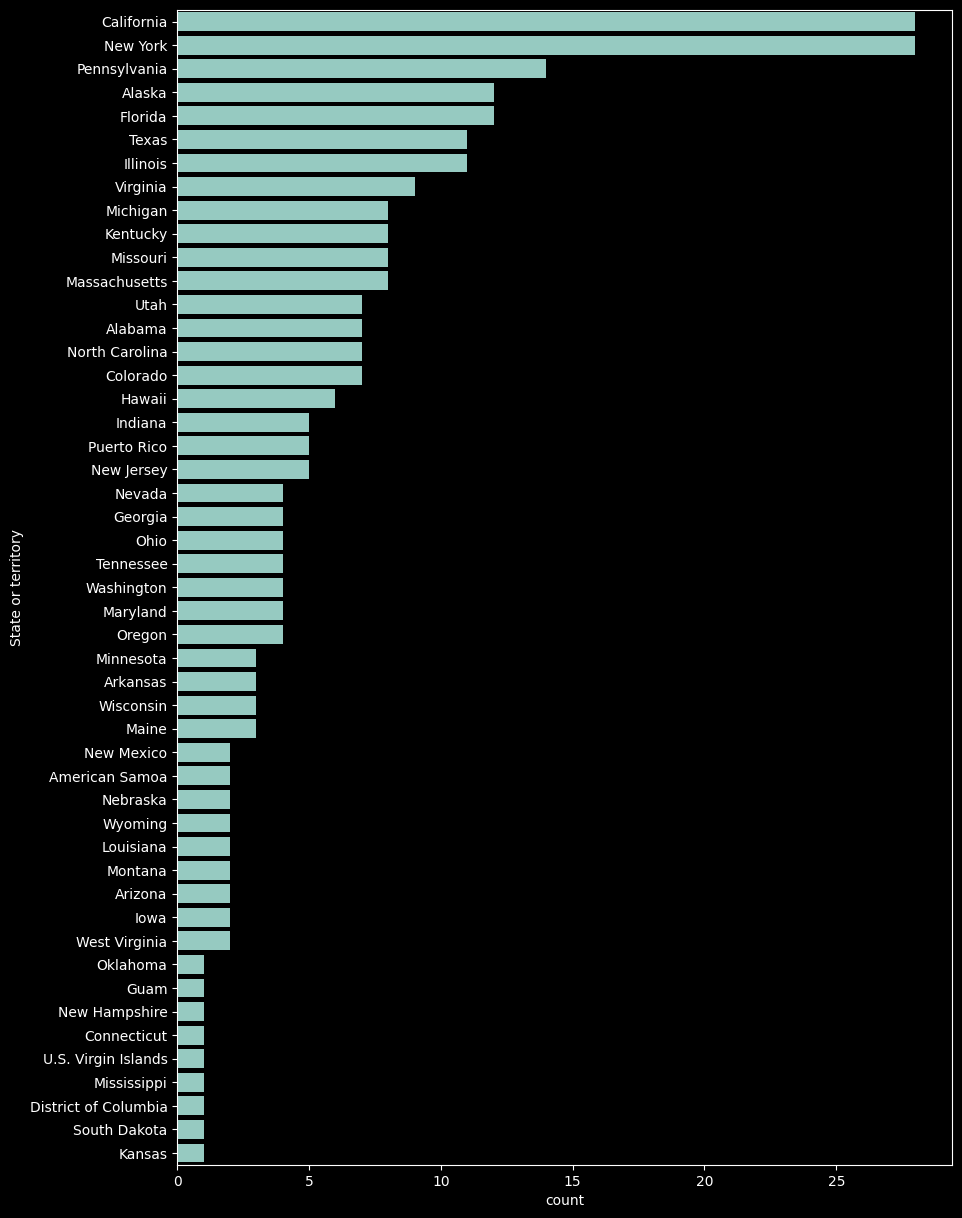

In [20]:
fig = plt.figure(figsize=(10, 15))
sns.barplot(df_location, orient='y')

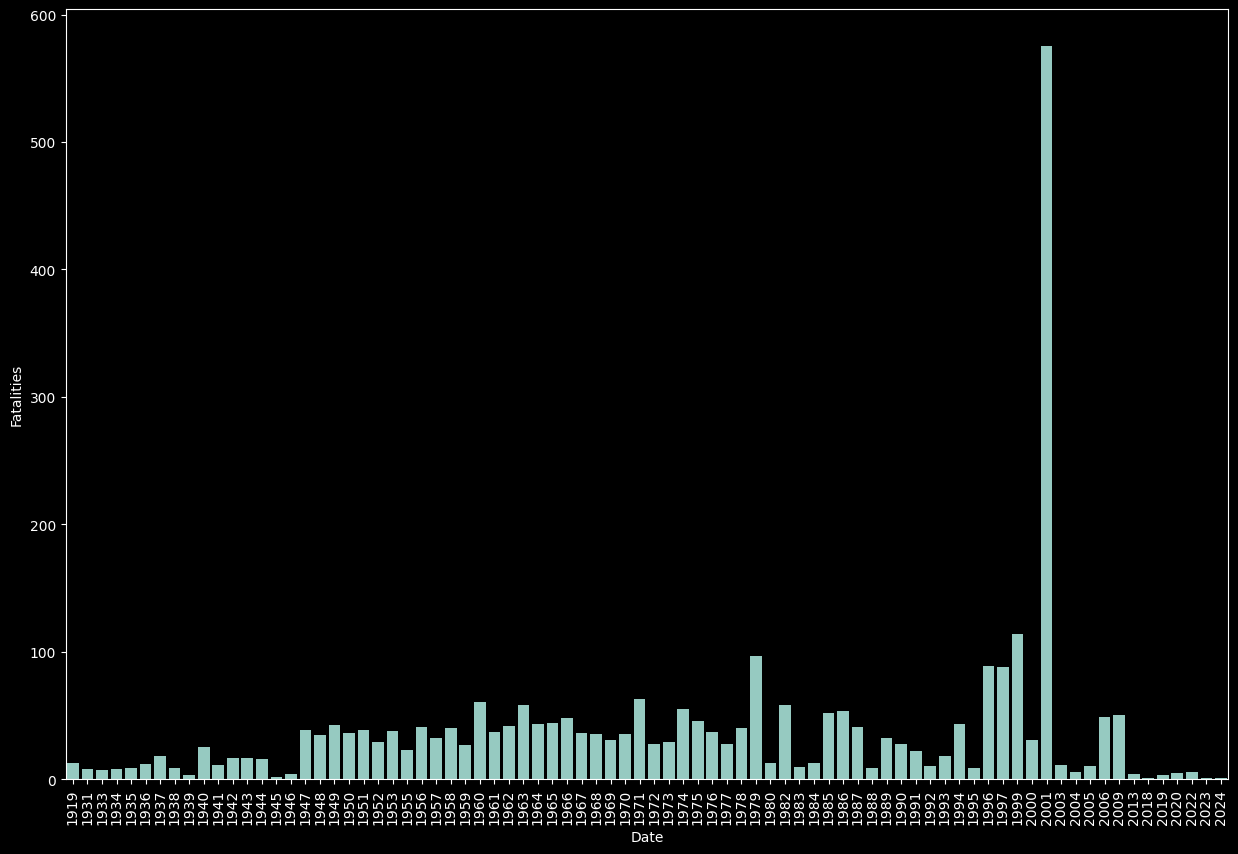

In [21]:
fig = plt.figure(figsize=(15,10))
sns.barplot(df, x=df.index.year, y=df.Fatalities, errorbar=None)
plt.xticks(rotation=90)
plt.show()


In [34]:
df_911 = df.drop(['2001-09-11'])

C:\Users\louza\AppData\Local\Temp\ipykernel_30676\2556101127.py:1: FutureWarning: The behavior of 'isin' with dtype=datetime64[ns] and castable values (e.g. strings) is deprecated. In a future version, these will not be considered matching by isin. Explicitly cast to the appropriate dtype before calling isin instead.
  df_911 = df.drop(['2001-09-11'])


In [35]:
df_911.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 269 entries, 2024-01-01 to 1919-07-21
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Fatalities          269 non-null    int64 
 1   Injuries            269 non-null    int64 
 2   Survivors           269 non-null    int64 
 3   Location            269 non-null    object
 4   State or territory  269 non-null    object
 5   Aircraft            269 non-null    object
 6   Summary             269 non-null    object
dtypes: int64(3), object(4)
memory usage: 16.8+ KB


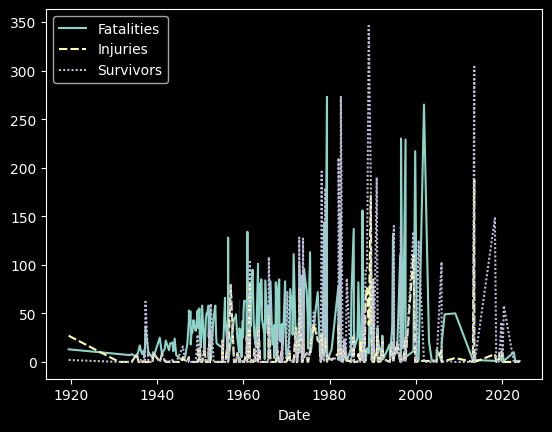

In [36]:
fig = plt.figure()
sns.lineplot(df_911)
plt.show()